### **Exercise1**

Write a matrix multiplication function using lists ("manually", using the matrix multiplication formula) and another one using numpy arrays (call matmul function). Time them both. 

In [1]:
import numpy as np

In [2]:
def my_mult(m1,m2,N):
    m3=[0 for i in range(N*N)]
    for i in range(N):
        for j in range(N):
            for k in range(N):
                m3[i*N+j]=m3[i*N+j]+m1[i*N+k]*m2[k*N+j]
    return m3

In [3]:
N=100
matr1=list(range(N*N))
matr2=list(range(N*N))

In [4]:
#%%timeit
matr3=my_mult(matr1,matr2,N)

In [5]:
nmatr1=np.arange(N*N).reshape(N,N)
nmatr2=np.arange(N*N).reshape(N,N)

In [6]:
#%%timeit
nmatr3=np.matmul(nmatr1,nmatr2)

In [7]:
#testing the result
test=np.array(matr3).reshape(N,N)
test==nmatr3

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

### **Exercise2**

Write a decorator that plots a function (of one variable) over the interval (0,100). Make sure your plot has a name, the axis names, nice color, changed background color and a legend.

Do the same using a different "interface".

In [8]:
import functools
from matplotlib import pyplot as plt
def my_plot1(func):
    @functools.wraps(func)
    def wrapper(arg):
        x = np.linspace(0,100,1000)
        y = func(x)
        plt.title('This is what the function looks like on 0 to 100 interval')
        plt.ylabel('This is the $y$ axis')
        plt.xlabel('This is the $x$ axis')
        import matplotlib.font_manager as font_manager
        font = font_manager.FontProperties(weight='bold',style='normal', size=16)
        #ok, for background ax interface is better, the next line does change background, but it screws up the whole notebook 
        #so I have it commented
       # plt.rcParams['axes.facecolor'] = "#000000"
        plt.plot(x,y, color="#00FF00", linewidth="2")
        #look at the extra comma in legend, it's important!
        plt.legend(('f(x)',),prop=font,loc='upper right', labelcolor='linecolor')
    return wrapper

In [9]:
@my_plot1
def my_cos(x):
    return np.cos(x)

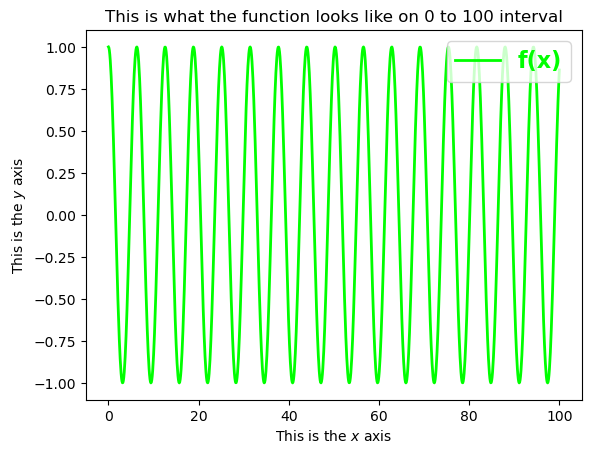

In [10]:
my_cos(2)

In [17]:
#version 2
import functools
def my_plot2(func):
    @functools.wraps(func)
    def wrapper(arg):
        x = np.linspace(0,100,1000)
        y = func(x)
        ax = plt.axes()
        ax.set_title('This is what the function looks like on 0 to 100 interval')
        ax.set_ylabel('This is the $y$ axis')
        ax.set_xlabel('This is the $x$ axis')
        ax.set_facecolor("#000000")
        ax.plot(x,y, color="#00FF00", linewidth="2")
        #look at the extra comma in legend, it's important!
        ax.legend(('f(x)',), loc='upper right', labelcolor='linecolor', shadow=True)
    return wrapper

In [18]:
@my_plot2
def sin(x):
    return np.sin(x)

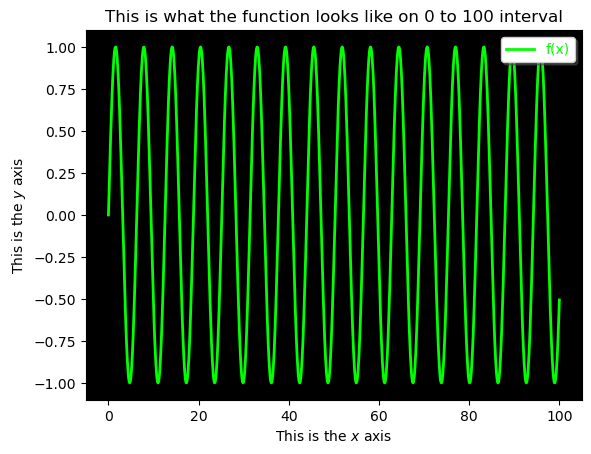

In [19]:
sin(3)

### **Exercise3:**

Plot the recaman sequence in the following way:

Add a semi-circular arc from $a_{n}$ to $a_{n-1}$.

Alternate the arcs to be above and below the x-axis according to whether
    n is even or odd.

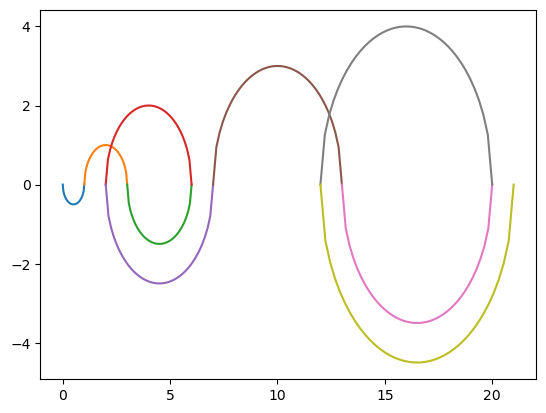

In [22]:
def recaman(max_terms):
    seq=np.empty(max_terms)
    exist = set([])
    n = 0 
    a = 0
    while n < max_terms:
        diff=a-n
        if diff > 0 and diff not in exist:
            a = diff
        else:
            a = a + n
        seq[n]=a
        exist.add(a)
        n += 1
    return seq
seq = recaman(10)
for i in range(1, len(seq)):
    h = (seq[i] + seq[i-1])/2
    r = abs((seq[i] - seq[i-1]))/2
    x = np.linspace(seq[i], seq[i-1], 40)
    y = (-1)**i * np.sqrt(r**2 - (x-h)**2)
    plt.plot(x, y)

### **Exercise4:**

Plot a rainbow.

### **Exercise5**

Plot a nice-looking 3-D torus. Do this 3 times with different styles. 

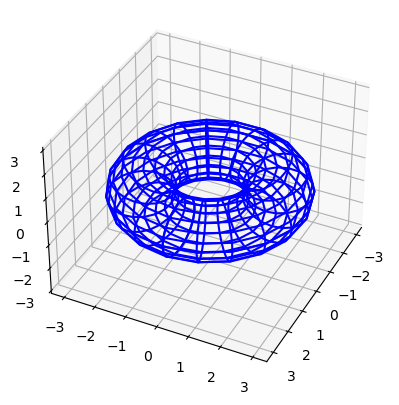

In [13]:
from mpl_toolkits import mplot3d
from matplotlib import pyplot as plt
n = 20

#setting up math equation
theta = np.linspace(0, 2.*np.pi, n)
phi = np.linspace(0, 2.*np.pi, n)
theta, phi = np.meshgrid(theta, phi)
c, a = 2, 1
x = (c + a*np.cos(theta)) * np.cos(phi)
y = (c + a*np.cos(theta)) * np.sin(phi)
z = a * np.sin(theta)

ax = plt.axes(projection='3d')

ax.set_zlim(-3,3)
ax.view_init(36, 26)
ax.plot_wireframe(x,y,z, color="#0000FF")


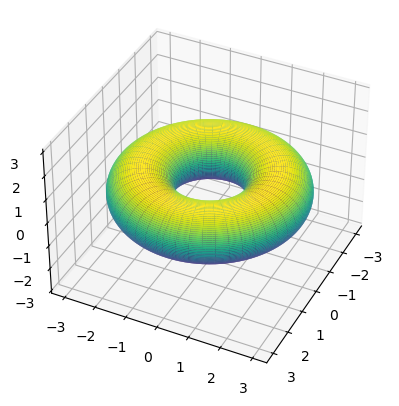

In [30]:
n = 100
#setting up math equation
theta = np.linspace(0, 2.*np.pi, n)
phi = np.linspace(0, 2.*np.pi, n)
theta, phi = np.meshgrid(theta, phi)
c, a = 2, 1
x = (c + a*np.cos(theta)) * np.cos(phi)
y = (c + a*np.cos(theta)) * np.sin(phi)
z = a * np.sin(theta)

ax = plt.axes(projection='3d')
ax.set_zlim(-3,3)
ax.view_init(37, 26)
my_col = cm.jet(np.random.rand(z.shape[0],z.shape[1]))
# available colormaps are here -  https://matplotlib.org/stable/tutorials/colors/colormaps.html
ax.plot_surface(x,y,z,rstride=2,cstride=1,cmap='viridis')

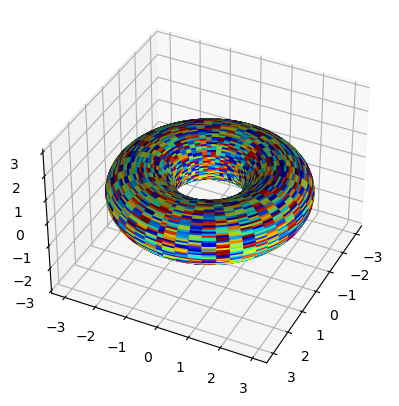

In [32]:

ax = plt.axes(projection='3d')
ax.set_zlim(-3,3)
ax.view_init(37, 26)
#example of how to contol colormaps with weird stuff
from matplotlib import cm
my_col = cm.jet(np.random.rand(z.shape[0],z.shape[1]))
ax.plot_surface(x,y,z,rstride=2,cstride=1,facecolors = my_col)